In [27]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Estimator
import numpy as np
import matplotlib.pyplot as plt

# Defining the H₂ molecular Hamiltonian in terms of Pauli operators
pauli_terms = [
    ("IIII", -1.0523732),    
    ("ZZII", 0.39793742),    
    ("IIZZ", -0.3979374),    
    ("IZIZ", -0.0112801),    
    ("ZIZI", -0.0112801),
    ("XXII", 0.1809312),     
    ("IIXX", 0.1809312),
    ("YYII", 0.1809312),     
    ("IIYY", 0.1809312),
]

# Preparing the Hamiltonian operator

labels, coeffs = zip(*pauli_terms)
hamiltonian = SparsePauliOp(labels, coeffs)

gate_pool = ["ry", "rz", "cx"]  # Rotation and entanglement gates

def sample_circuit(num_gates=5):
    qc = QuantumCircuit(4)
    qc.x(2)
    qc.x(3)
    
    # Adding random gates
    for _ in range(num_gates):
        g = np.random.choice(gate_pool)
        if g == "ry":
            qc.ry(np.pi / 4, np.random.randint(4))  # Random Y rotation
        elif g == "rz":
            qc.rz(np.pi / 4, np.random.randint(4))  # Random Z rotation
        elif g == "cx":
            q0, q1 = np.random.choice(4, 2, replace=False)
            qc.cx(q0, q1)  # Random CNOT between two different qubits
    return qc

# Set up the quantum estimator
estimator = Estimator()

#Calculate the expected energy of a given quantum state.

def evaluate_energy(qc):
    
    return estimator.run(qc, hamiltonian).result().values[0]

num_samples = 30  # Number of random circuits to try
energies = []
best_energy = float("inf")  # Start with worst possible energy
best_circuit = None

print("Beginning quantum energy search...")
for i in range(num_samples):
    qc = sample_circuit(num_gates=5)  # Try circuits with 5 gates
    energy = evaluate_energy(qc)
    energies.append(energy)
    
    # Keep track of the best solution found
    if energy < best_energy:
        best_energy = energy
        best_circuit = qc
    print(f"Sample {i+1}/{num_samples}: Energy = {energy:.6f} Hartree")


Beginning quantum energy search...
Sample 1/30: Energy = -1.848248 Hartree
Sample 2/30: Energy = -1.149596 Hartree
Sample 3/30: Energy = -1.149670 Hartree
Sample 4/30: Energy = -1.052373 Hartree
Sample 5/30: Energy = -1.461591 Hartree
Sample 6/30: Energy = -0.637411 Hartree
Sample 7/30: Energy = -0.916564 Hartree
Sample 8/30: Energy = -1.149670 Hartree
Sample 9/30: Energy = -1.036421 Hartree
Sample 10/30: Energy = -0.916564 Hartree
Sample 11/30: Energy = -0.489605 Hartree
Sample 12/30: Energy = -1.149670 Hartree
Sample 13/30: Energy = -0.365001 Hartree
Sample 14/30: Energy = -1.149670 Hartree
Sample 15/30: Energy = -0.369748 Hartree
Sample 16/30: Energy = -1.035453 Hartree
Sample 17/30: Energy = -1.848248 Hartree
Sample 18/30: Energy = -0.479218 Hartree
Sample 19/30: Energy = -0.654436 Hartree
Sample 20/30: Energy = -0.660150 Hartree
Sample 21/30: Energy = -1.036421 Hartree
Sample 22/30: Energy = -1.036421 Hartree
Sample 23/30: Energy = -1.439030 Hartree
Sample 24/30: Energy = -0.86587

C:\Users\AYUSH\AppData\Local\Temp\ipykernel_4600\1564863243.py:45: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


In [ ]:

# Results summary
print("\nSearch complete!")
print(f"Best energy found: {best_energy:.6f} Hartree")
print("Circuit that achieved this energy:")
print(best_circuit.draw("text"))  


Search complete!
Best energy found: -1.848248 Hartree
Circuit that achieved this energy:
                          ┌───┐
q_0: ──■──────────────────┤ X ├
     ┌─┴─┐                └─┬─┘
q_1: ┤ X ├─────────────■────■──
     ├───┤             │  ┌───┐
q_2: ┤ X ├─────────────┼──┤ X ├
     ├───┤┌─────────┐┌─┴─┐└─┬─┘
q_3: ┤ X ├┤ Rz(π/4) ├┤ X ├──■──
     └───┘└─────────┘└───┘     


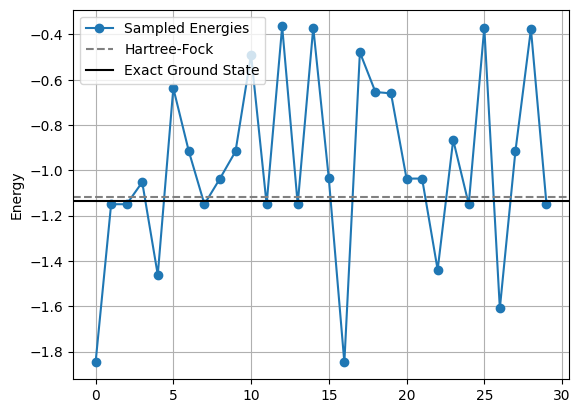

In [29]:
# Plotting the results

# refrences energies
hf_energy = -1.117  
exact_energy = -1.137  

# Plot
plt.plot(energies, 'o-', label="Sampled Energies")
plt.axhline(hf_energy, color='gray', linestyle='--', label="Hartree-Fock")
plt.axhline(exact_energy, color='black', linestyle='-', label="Exact Ground State")
plt.ylabel("Energy")
plt.legend()
plt.grid(True)
plt.show()